In [5]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [6]:
user=pd.read_excel("FixRoute.xlsx")

In [7]:
user.head()

,Request_ID,User_ID,User_Name,User_Phone,User_Location,User_to_Technician_Distance,Estimated_Delivery_Time,Vehicle_Company,Vehicle_Model,Model_Year,...,Estimated_arrival_time_ETA,Past_performance_ratings,Total_Price,Final_Price,User_Lat,User_Lng,Tech_Lat,Tech_Lng,Road_Distance,Road_Duration
0,R200000,U300000,Ravi,9842111753,Ameerpet,7.97,31.59,Suzuki,Thar,2018,...,78.13,3.36,227.85,2427.85,17.437487,78.44824,17.444939,78.35281,14302.371,2346.987
1,R200001,U300001,Teja,9593633618,Gachibowli,17.97,26.97,TVS,Thar,2011,...,78.50,4.83,263.29,1463.29,17.444939,78.35281,17.437487,78.44824,13578.244,2162.909
2,R200002,U300002,Vikram,9690521260,Kukatpally,23.43,43.99,Suzuki,Thar,2013,...,36.88,4.57,244.76,3744.76,17.492798,78.40409,17.423082,78.58749,27334.205,4175.665
3,R200003,U300003,Arjun,9339304283,Miyapur,8.04,34.07,Mahindra,Thar,2022,...,12.91,4.72,224.05,2024.05,17.497890,78.35769,17.449963,78.53575,24080.223,3693.509
4,R200004,U300004,Ravi,9561776474,Kukatpally,14.30,56.22,BMW,Thar,2024,...,59.42,4.20,224.59,524.59,17.492798,78.40409,17.437487,78.44824,9623.139,1445.366


In [8]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Request_ID                   1000 non-null   object 
 1   User_ID                      1000 non-null   object 
 2   User_Name                    1000 non-null   object 
 3   User_Phone                   1000 non-null   int64  
 4   User_Location                1000 non-null   object 
 5   User_to_Technician_Distance  1000 non-null   float64
 6   Estimated_Delivery_Time      1000 non-null   float64
 7   Vehicle_Company              1000 non-null   object 
 8   Vehicle_Model                1000 non-null   object 
 9   Model_Year                   1000 non-null   int64  
 10  Service_Name                 1000 non-null   object 
 11  Service_Description          1000 non-null   object 
 12  Spare_Part_Name              1000 non-null   object 
 13  Spare_Part_Price   

Converting into lowercases

In [9]:
user.columns =  user.columns.str.title()

In [10]:
for col in user.select_dtypes("O").columns:
    user[col] = user[col].str.lower()

In [11]:
user.head()

,Request_Id,User_Id,User_Name,User_Phone,User_Location,User_To_Technician_Distance,Estimated_Delivery_Time,Vehicle_Company,Vehicle_Model,Model_Year,...,Estimated_Arrival_Time_Eta,Past_Performance_Ratings,Total_Price,Final_Price,User_Lat,User_Lng,Tech_Lat,Tech_Lng,Road_Distance,Road_Duration
0,r200000,u300000,ravi,9842111753,ameerpet,7.97,31.59,suzuki,thar,2018,...,78.13,3.36,227.85,2427.85,17.437487,78.44824,17.444939,78.35281,14302.371,2346.987
1,r200001,u300001,teja,9593633618,gachibowli,17.97,26.97,tvs,thar,2011,...,78.50,4.83,263.29,1463.29,17.444939,78.35281,17.437487,78.44824,13578.244,2162.909
2,r200002,u300002,vikram,9690521260,kukatpally,23.43,43.99,suzuki,thar,2013,...,36.88,4.57,244.76,3744.76,17.492798,78.40409,17.423082,78.58749,27334.205,4175.665
3,r200003,u300003,arjun,9339304283,miyapur,8.04,34.07,mahindra,thar,2022,...,12.91,4.72,224.05,2024.05,17.497890,78.35769,17.449963,78.53575,24080.223,3693.509
4,r200004,u300004,ravi,9561776474,kukatpally,14.30,56.22,bmw,thar,2024,...,59.42,4.20,224.59,524.59,17.492798,78.40409,17.437487,78.44824,9623.139,1445.366


Validation for each column data in two datasets

In [12]:
for col in user.columns:
    print(f"Column: {col}")
    print(f"Number of Unique Values in Column: {user[col].nunique()}")
    print("Unique Values:")
    if user[col].nunique()>=100:
        for indx in range(0, user[col].nunique(), 100):
            print(user[col].unique()[indx:indx+100])
    else:
        print(user[col].unique())
    print(f"Data Type of Column: {user[col].dtype}")
    print()

Column: Request_Id
Number of Unique Values in Column: 1000
Unique Values:
['r200000' 'r200001' 'r200002' 'r200003' 'r200004' 'r200005' 'r200006'
 'r200007' 'r200008' 'r200009' 'r200010' 'r200011' 'r200012' 'r200013'
 'r200014' 'r200015' 'r200016' 'r200017' 'r200018' 'r200019' 'r200020'
 'r200021' 'r200022' 'r200023' 'r200024' 'r200025' 'r200026' 'r200027'
 'r200028' 'r200029' 'r200030' 'r200031' 'r200032' 'r200033' 'r200034'
 'r200035' 'r200036' 'r200037' 'r200038' 'r200039' 'r200040' 'r200041'
 'r200042' 'r200043' 'r200044' 'r200045' 'r200046' 'r200047' 'r200048'
 'r200049' 'r200050' 'r200051' 'r200052' 'r200053' 'r200054' 'r200055'
 'r200056' 'r200057' 'r200058' 'r200059' 'r200060' 'r200061' 'r200062'
 'r200063' 'r200064' 'r200065' 'r200066' 'r200067' 'r200068' 'r200069'
 'r200070' 'r200071' 'r200072' 'r200073' 'r200074' 'r200075' 'r200076'
 'r200077' 'r200078' 'r200079' 'r200080' 'r200081' 'r200082' 'r200083'
 'r200084' 'r200085' 'r200086' 'r200087' 'r200088' 'r200089' 'r200090'
 'r

In [13]:
user[user.duplicated()]

,Request_Id,User_Id,User_Name,User_Phone,User_Location,User_To_Technician_Distance,Estimated_Delivery_Time,Vehicle_Company,Vehicle_Model,Model_Year,...,Estimated_Arrival_Time_Eta,Past_Performance_Ratings,Total_Price,Final_Price,User_Lat,User_Lng,Tech_Lat,Tech_Lng,Road_Distance,Road_Duration


In [14]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Request_Id                   1000 non-null   object 
 1   User_Id                      1000 non-null   object 
 2   User_Name                    1000 non-null   object 
 3   User_Phone                   1000 non-null   int64  
 4   User_Location                1000 non-null   object 
 5   User_To_Technician_Distance  1000 non-null   float64
 6   Estimated_Delivery_Time      1000 non-null   float64
 7   Vehicle_Company              1000 non-null   object 
 8   Vehicle_Model                1000 non-null   object 
 9   Model_Year                   1000 non-null   int64  
 10  Service_Name                 1000 non-null   object 
 11  Service_Description          1000 non-null   object 
 12  Spare_Part_Name              1000 non-null   object 
 13  Spare_Part_Price   

In [15]:
!pip install simple_colors
from eda import Univariate

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [17]:
display(round(user[['User_To_Technician_Distance', 'Estimated_Delivery_Time']].corr(),2))

,User_To_Technician_Distance,Estimated_Delivery_Time
User_To_Technician_Distance,1.00,-0.02
Estimated_Delivery_Time,-0.02,1.00


<Axes: >

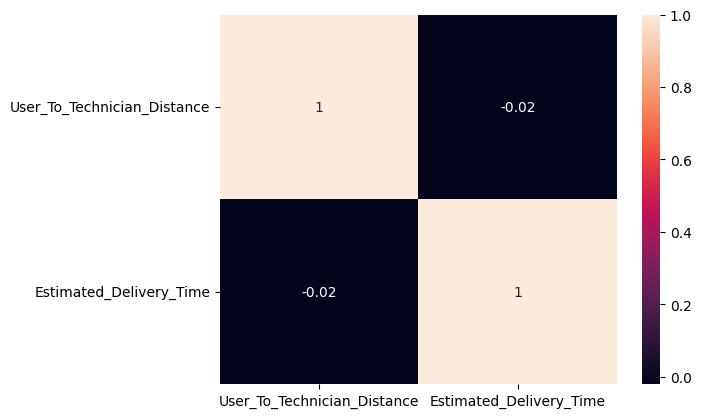

In [18]:
sns.heatmap(round(user[['User_To_Technician_Distance', 'Estimated_Delivery_Time']].corr(),2), annot=True)

In [19]:

display(round(user[['User_To_Technician_Distance', 'Estimated_Delivery_Time']].corr(),2))

,User_To_Technician_Distance,Estimated_Delivery_Time
User_To_Technician_Distance,1.00,-0.02
Estimated_Delivery_Time,-0.02,1.00


In [20]:
user.isna()

,Request_Id,User_Id,User_Name,User_Phone,User_Location,User_To_Technician_Distance,Estimated_Delivery_Time,Vehicle_Company,Vehicle_Model,Model_Year,...,Estimated_Arrival_Time_Eta,Past_Performance_Ratings,Total_Price,Final_Price,User_Lat,User_Lng,Tech_Lat,Tech_Lng,Road_Distance,Road_Duration
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
user.isna().sum()

,0
Request_Id,0
User_Id,0
User_Name,0
User_Phone,0
User_Location,0
User_To_Technician_Distance,0
Estimated_Delivery_Time,0
Vehicle_Company,0
Vehicle_Model,0
Model_Year,0


In [22]:
user.shape

(1000, 36)

In [23]:
user.head()

,Request_Id,User_Id,User_Name,User_Phone,User_Location,User_To_Technician_Distance,Estimated_Delivery_Time,Vehicle_Company,Vehicle_Model,Model_Year,...,Estimated_Arrival_Time_Eta,Past_Performance_Ratings,Total_Price,Final_Price,User_Lat,User_Lng,Tech_Lat,Tech_Lng,Road_Distance,Road_Duration
0,r200000,u300000,ravi,9842111753,ameerpet,7.97,31.59,suzuki,thar,2018,...,78.13,3.36,227.85,2427.85,17.44,78.45,17.44,78.35,14302.37,2346.99
1,r200001,u300001,teja,9593633618,gachibowli,17.97,26.97,tvs,thar,2011,...,78.50,4.83,263.29,1463.29,17.44,78.35,17.44,78.45,13578.24,2162.91
2,r200002,u300002,vikram,9690521260,kukatpally,23.43,43.99,suzuki,thar,2013,...,36.88,4.57,244.76,3744.76,17.49,78.40,17.42,78.59,27334.21,4175.66
3,r200003,u300003,arjun,9339304283,miyapur,8.04,34.07,mahindra,thar,2022,...,12.91,4.72,224.05,2024.05,17.50,78.36,17.45,78.54,24080.22,3693.51
4,r200004,u300004,ravi,9561776474,kukatpally,14.30,56.22,bmw,thar,2024,...,59.42,4.20,224.59,524.59,17.49,78.40,17.44,78.45,9623.14,1445.37


In [24]:
import requests

MAPBOX_TOKEN = "pk.eyJ1IjoiY2hhdDEyMyIsImEiOiJjbWk0ZDljNjgxZWJwMmpzZmdsbGo1Y2hzIn0.Gsz2y11JR9GfLcpEb58K_Q"

def get_mapbox_features(start, end):
    url = f"https://api.mapbox.com/directions/v5/mapbox/driving/{start};{end}?access_token={MAPBOX_TOKEN}"

    r = requests.get(url).json()
    route = r["routes"][0]

    return {
        "road_distance_m": route["distance"],
        "road_duration_s": route["duration"]
    }

# Example for a single row
lat1, lon1 = 17.385, 78.4867      # technician
lat2, lon2 = 17.450, 78.5001      # user

features = get_mapbox_features(f"{lon1},{lat1}", f"{lon2},{lat2}")
print(features)

{'road_distance_m': 9669.848, 'road_duration_s': 1917.359}


In [25]:
numdata=user.select_dtypes(exclude="O")

In [26]:
numdata.head()

,User_Phone,User_To_Technician_Distance,Estimated_Delivery_Time,Model_Year,Spare_Part_Price,Technician_Rating,Base_Charge,Handling_Surge_Charges,Distance_Hub_To_User_Kms,Estimated_Arrival_Time_Eta,Past_Performance_Ratings,Total_Price,Final_Price,User_Lat,User_Lng,Tech_Lat,Tech_Lng,Road_Distance,Road_Duration
0,9842111753,7.97,31.59,2018,2200,4.75,150,91.20,17.55,78.13,3.36,227.85,2427.85,17.44,78.45,17.44,78.35,14302.37,2346.99
1,9593633618,17.97,26.97,2011,1200,4.93,150,64.79,29.65,78.50,4.83,263.29,1463.29,17.44,78.35,17.44,78.45,13578.24,2162.91
2,9690521260,23.43,43.99,2013,3500,5.00,150,82.18,20.20,36.88,4.57,244.76,3744.76,17.49,78.40,17.42,78.59,27334.21,4175.66
3,9339304283,8.04,34.07,2022,1800,3.80,150,62.10,1.02,12.91,4.72,224.05,2024.05,17.50,78.36,17.45,78.54,24080.22,3693.51
4,9561776474,14.30,56.22,2024,300,4.71,150,79.93,33.99,59.42,4.20,224.59,524.59,17.49,78.40,17.44,78.45,9623.14,1445.37


In [27]:
def Outlier_Identification(numdata):
    for col in numdata.columns:
        print("Column:", col)
        print()
        # quantiles
        q1 = numdata[col].quantile(0.25)
        q3 = numdata[col].quantile(0.75)
        # iqr
        iqr = q3-q1
        # ranges
        lowerbound = q1-(1.5*iqr)
        upperbound = q3+(1.5*iqr)

        lowerout = []
        upperout = []

        for val in numdata[col]:
            if val<lowerbound:
                lowerout.append(val)
            elif val>upperbound:
                upperout.append(val)

        lowerout.sort()
        upperout.sort()

        print("Lower Outliers:")
        print(lowerout)
        print()
        print("Total Number of Set of Lower Outliers:", len(set(lowerout)))
        print("Total Number of Lower Outliers:", len(lowerout))
        print()
        print("Upper Outliers:")
        print(upperout)
        print()
        print("Number of Set of Upper Outliers:", len(set(upperout)))
        print("Total Number of Upper Outliers:", len(upperout))
        print("===============================================")
        print()

In [28]:
Outlier_Identification(numdata)

Column: User_Phone

Lower Outliers:
[]

Total Number of Set of Lower Outliers: 0
Total Number of Lower Outliers: 0

Upper Outliers:
[]

Number of Set of Upper Outliers: 0
Total Number of Upper Outliers: 0

Column: User_To_Technician_Distance

Lower Outliers:
[]

Total Number of Set of Lower Outliers: 0
Total Number of Lower Outliers: 0

Upper Outliers:
[]

Number of Set of Upper Outliers: 0
Total Number of Upper Outliers: 0

Column: Estimated_Delivery_Time

Lower Outliers:
[]

Total Number of Set of Lower Outliers: 0
Total Number of Lower Outliers: 0

Upper Outliers:
[]

Number of Set of Upper Outliers: 0
Total Number of Upper Outliers: 0

Column: Model_Year

Lower Outliers:
[]

Total Number of Set of Lower Outliers: 0
Total Number of Lower Outliers: 0

Upper Outliers:
[]

Number of Set of Upper Outliers: 0
Total Number of Upper Outliers: 0

Column: Spare_Part_Price

Lower Outliers:
[]

Total Number of Set of Lower Outliers: 0
Total Number of Lower Outliers: 0

Upper Outliers:
[]

Numb

In [29]:
import plotly.express as px

In [30]:
for col in numdata.columns:
    px.box(numdata[col], orientation='h', height=300, width=750, title=f"{col.title()} Boxplot").show()

In [31]:
import pandas as pd
import numpy as np
import requests
import joblib
import folium
from math import radians, sin, cos, sqrt, atan2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [32]:
MAPBOX_TOKEN = "pk.eyJ1IjoiY2hhdDEyMyIsImEiOiJjbWk0ZDljNjgxZWJwMmpzZmdsbGo1Y2hzIn0.Gsz2y11JR9GfLcpEb58K_Q"


In [47]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2-lat1, lon2-lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    return R * 2 * atan2(sqrt(a), sqrt(1-a))


# synthetic sample dataset (replace with your real one)
def create_dataset(n=1000):
    rng = np.random.RandomState(42)

    user_lat = 17.4 + rng.normal(0, 0.01, n)
    user_lon = 78.48 + rng.normal(0, 0.01, n)

    tech_lat = user_lat + rng.normal(0, 0.02, n)
    tech_lon = user_lon + rng.normal(0, 0.02, n)

    distance = [haversine(a,b,c,d) for a,b,c,d in zip(user_lat,user_lon,tech_lat,tech_lon)]



    eta = (np.array(distance)/0.6) * (1 + rng.uniform(0,1,n))

    df = pd.DataFrame({
        "user_lat": user_lat,
        "user_lon": user_lon,
        "tech_lat": tech_lat,
        "tech_lon": tech_lon,
        "distance_km": distance,
        "eta_minutes": eta
    })
    return df

df = create_dataset()
df.head()


,user_lat,user_lon,tech_lat,tech_lon,distance_km,eta_minutes
0,17.40,78.49,17.39,78.46,4.32,10.69
1,17.40,78.49,17.40,78.47,1.85,3.35
2,17.41,78.48,17.39,78.47,1.97,6.47
3,17.42,78.47,17.41,78.51,4.06,10.28
4,17.40,78.49,17.36,78.50,4.37,11.77


In [48]:
def get_mapbox_route(user_lat, user_lon, tech_lat, tech_lon):

    url = f"https://api.mapbox.com/directions/v5/mapbox/driving-traffic/{user_lon},{user_lat};{tech_lon},{tech_lat}"
    params = {
        "access_token": MAPBOX_TOKEN,
        "geometries": "geojson",
        "annotations": "congestion",
        "overview": "full" # Added this line to fix the error
    }

    response = requests.get(url, params=params)
    data = response.json()

    if "routes" not in data:
        print(f"Mapbox API error: {data.get('message', 'Unknown error')}")
        raise ValueError(f"Mapbox API did not return routes. Full response: {data}")

    route = data["routes"][0]

    distance_km = route["distance"] / 1000
    duration_min = route["duration"] / 60
    coords = route["geometry"]["coordinates"]

    # Get congestion → traffic level
    congestion = []
    try:
        for leg in route["legs"]:
            if "annotation" in leg and "congestion" in leg["annotation"]:
                for c in leg["annotation"]["congestion"]:
                    congestion.append(c)
    except Exception as e:
        print(f"Error extracting congestion data: {e}")
        congestion = []

    if congestion:
        if "heavy" in congestion or "severe" in congestion:
            traffic = "heavy"
        elif "moderate" in congestion:
            traffic = "moderate"
        else:
            traffic = "light"
    else:
        # fallback
        normal_eta = distance_km / 0.6
        ratio = duration_min / normal_eta
        traffic = "light" if ratio < 1.1 else "moderate" if ratio < 1.4 else "heavy"

    return distance_km, duration_min, traffic, coords

In [49]:
def create_dataset(n=1500):
    rng = np.random.RandomState(42)

    # Get unique service names from the 'user' dataframe for synthetic data
    # The 'user' dataframe was loaded from 'FixRoute.xlsx' and contains 'service_name' column
    service_names_list = user['Service_Name'].unique().tolist()

    dist = rng.uniform(1, 15, n)
    traffic = rng.choice(["light","moderate","heavy"], n)
    rating = rng.uniform(3, 5, n)
    charge = rng.uniform(150, 600, n)
    service_name = rng.choice(service_names_list, n) # Add service_name column

    eta = (dist/0.5) * (1 + rng.random(n))

    df = pd.DataFrame({
        "distance_km": dist,
        "hour_of_day": hour,
        "road_condition": road_condition,
        "traffic_level": traffic,
        "technician_rating": rating,
        "technician_charges": charge,
        "service_name": service_name, # Add service_name to the DataFrame
        "eta_minutes": eta
    })
    return df

df = create_dataset()

Q1 = df["eta_minutes"].quantile(0.25)
Q3 = df["eta_minutes"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["eta_minutes"] >= Q1 - 1.5*IQR) & (df["eta_minutes"] <= Q3 + 1.5*IQR)]
df = df.reset_index(drop=True)

In [50]:
Q1 = df["eta_minutes"].quantile(0.25)
Q3 = df["eta_minutes"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["eta_minutes"] >= Q1 - 1.5*IQR) & (df["eta_minutes"] <= Q3 + 1.5*IQR)]
df = df.reset_index(drop=True)

In [51]:
X = df[[
    "distance_km",
    "service_name", # Corrected column name to 'service_name' (lowercase)
    "traffic_level",
    "technician_rating",
    "technician_charges"
]]

y = df["eta_minutes"]

In [52]:
num_cols = ["distance_km","technician_rating","technician_charges"]
cat_cols = ["traffic_level", "service_name"] # Added 'service_name' to categorical features

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [54]:
models = {
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(n_estimators=150),
    "GradientBoosting": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor(n_neighbors=8)
}

trained_models = {}
results = []

for name, model in models.items():
    pipe = Pipeline([("pre", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)

    pred = pipe.predict(X_test)

    trained_models[name] = pipe

    # Calculate MSE and then take its square root for RMSE
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)

    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, pred),
        "RMSE": rmse,
        "R2": r2_score(y_test, pred)
    })

results_df = pd.DataFrame(results)
print(results_df)

              Model  MAE  RMSE   R2
0      DecisionTree 5.20  7.18 0.72
1      RandomForest 4.21  5.51 0.83
2  GradientBoosting 4.19  5.49 0.84
3               KNN 5.06  6.49 0.77


In [55]:
best = results_df.sort_values("MAE").iloc[0]["Model"]
joblib.dump(trained_models[best], "best_eta_model.joblib")
print("Best Model Saved:", best)

Best Model Saved: GradientBoosting


In [56]:
def recommend_top3(user_lat, user_lon, technicians):

    model = joblib.load("best_eta_model.joblib")

    results = []

    for tech in technicians:

        # 1. Mapbox distance + ETA + traffic
        distance_km, map_eta, traffic_level, coords = get_mapbox_route(
            user_lat, user_lon, tech["Tech_Lat"], tech["Tech_Lng"]
        )

        # 2. ML ETA
        df = pd.DataFrame([{
            "distance_km": distance_km,
            "service_name": tech["Service_Name"], # Corrected to pass the actual service name from tech
            "traffic_level": traffic_level,
            "technician_rating": tech["Technician_Rating"],
            "technician_charges": tech["Base_Charge"]
        }])

        ml_eta = model.predict(df)[0]

        # 3. Blended ETA
        final_eta = (ml_eta + map_eta) / 2

        results.append({
            "name": tech["Technician_Name"],
            "area": tech["Technician_Location"],
            "Service_Name": tech["Service_Name"], # Corrected to pass the actual service name from tech
            "rating": tech["Technician_Rating"],
            "charge": tech["Base_Charge"],
            "distance_km": distance_km,
            "traffic_level": traffic_level,
            "eta": final_eta,
            "coords": coords,
            "lat": tech["Tech_Lat"],
            "lon": tech["Tech_Lng"]
        })

    df = pd.DataFrame(results)
    return df.sort_values("eta").head(3)

In [57]:
def show_route(route, user_lat, user_lon, tech_lat, tech_lon):
    m = folium.Map(location=[user_lat, user_lon], zoom_start=12)

    folium.Marker([user_lat, user_lon], tooltip="User",
                  icon=folium.Icon(color="green")).add_to(m)

    folium.Marker([tech_lat, tech_lon], tooltip="Technician",
                  icon=folium.Icon(color="red")).add_to(m)

    path = [(lat, lon) for lon, lat in route]
    folium.PolyLine(path, color="blue", weight=5).add_to(m)

    return m

In [58]:
def load_technicians(excel="FixRoute.xlsx"):
    df = pd.read_excel(excel)
    # Apply the same column name and string value normalization as the main dataframe
    df.columns = df.columns.str.title()
    for col in df.select_dtypes("O").columns:
        df[col] = df[col].str.lower()

    required_cols = ["Technician_Name", "Technician_Location", "Tech_Lat", "Tech_Lng", "Service_Name","Past_Performance_Ratings", "Base_Charge"]
    # Now check for consistent title-cased column names
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' missing in technician excel file!")

    return df

In [61]:
# Manual Inputs
user_lat = float(input("Enter User Latitude: "))
user_lon = float(input("Enter User Longitude: "))

technicians_df = load_technicians("FixRoute.xlsx")


# Get Top 3
top3 = recommend_top3(user_lat, user_lon, technicians_df.to_dict(orient="records"))
print("\nTOP 3 TECHNICIANS:\n")
print(top3[["name","area","rating","charge","distance_km","Service_Name","traffic_level","eta"]])

# User selects one
index = int(input("\nSelect technician index (0/1/2): "))
selected = top3.iloc[index]

print("\nSelected Technician:")
print(selected)

# Show map
map_display = show_route(
    selected["coords"], user_lat, user_lon,
    selected["lat"], selected["lon"]
)
map_display

Enter User Latitude: 17.45
Enter User Longitude: 78.38

TOP 3 TECHNICIANS:

      name      area  rating  charge  distance_km              Service_Name  \
268  kumar  kondapur    3.75     150         3.73  sos emergency assistance   
801  kumar  kondapur    4.35     150         3.73  sos emergency assistance   
522  kumar  kondapur    4.78     150         3.73  sos emergency assistance   

    traffic_level   eta  
268      moderate 11.38  
801      moderate 11.41  
522      moderate 11.48  

Select technician index (0/1/2): 2

Selected Technician:
name                                                         kumar
area                                                      kondapur
Service_Name                              sos emergency assistance
rating                                                        4.78
charge                                                         150
distance_km                                                   3.73
traffic_level                              